<a href="https://colab.research.google.com/github/rubypnchl/Deep-Learning/blob/main/CNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is an implementation of Convolution Neural Network on CIFAR images dataset. This code is developed using tensor flow official tutorial to understand the working of CNN.

### First, import all the necessary libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Second, Download and prepare the CIFAR10 dataset

CIFAR10 dataset have 60k color images with 10 classes where each class have 6000 images. These 60k images are divided into 50k and 10k as training and testing images respectively. The classes are mutually exclusive and no two class have overlapping images.

In [4]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

#To make CNN learning easy and faster, normalize the pixel values between 0 and 1.
train_images, test_images = train_images / 255.0, test_images / 250.0

Check the dataset look. Let's plot first few (25) images from training set and display class of below each image.


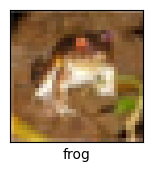

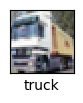

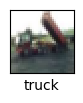

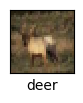

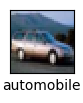

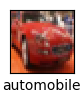

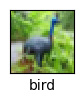

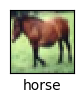

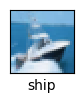

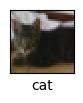

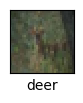

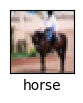

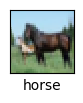

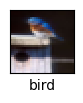

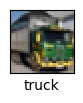

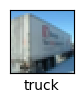

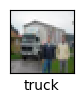

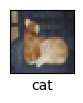

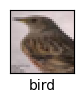

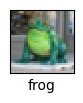

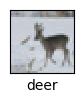

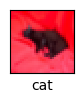

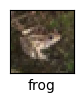

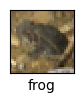

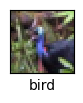

In [29]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])

  #The CIFAR labels are the arrays, therefore, we need to consider extra index
  plt.xlabel(class_names[train_labels[i][0]])
  plt.show()


### Create the convolutional base:
It is a 6 lines of code using a common flow: a stack of Cov2D and MaxPooling2D layers.

CNN Input:tensors with shape(image_height,image_width,color_channels)
The color channels are R,G,B. The shape of input is (32,32,3) which is actually the format of CIFAR images.

In [30]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

Display the model architecture summary

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In the model architecture summary output, every Conv2D and MaxPooling2D layer has a 3D tensor of shape(height, width,channels).

The height, weight tends to shrink as we move deeper into the network.
The first agurment in Conv2D layer controls the number of output channels.

As the width and height of the images shrink going deep into the network, the computation cost goes down and facilitates towards adding more output channels in each Conv2D layer.

## After flattening add input neurons using Dense function



The last output tensor from convolution base of shape (4,4,,64) into one or more Dense layers to perform classification task.
Dense layers takes elongated output in vector of size 1D as input while the current output is a 3D.
Once the Convolution base is ready. The CNN will last step i.e. flattening where the output from Convolution base is elongated from 3D to 1D, then add one or more Dense layers on top and the CNN behaves like ANN which has 10 output classes. So, we use a final Dense layer with 10 outputs.

In [32]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))


Display the complete architecture of the CNN model

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [35]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 13s 5ms/step - loss: 1.5391 - accuracy: 0.4419 - val_loss: 1.4515 - val_accuracy: 0.4905
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1549 - accuracy: 0.5901 - val_loss: 1.0599 - val_accuracy: 0.6253
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9944 - accuracy: 0.6519 - val_loss: 0.9976 - val_accuracy: 0.6548
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8973 - accuracy: 0.6841 - val_loss: 0.9399 - val_accuracy: 0.6678
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8203 - accuracy: 0.7135 - val_loss: 0.8908 - val_accuracy: 0.7002
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7645 - accuracy: 0.7323 - val_loss: 0.8767 - val_accuracy: 0.6952
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7086 - accuracy: 0.7523 - val_loss: 0.8962 - val_accur

### Evaluate the model

313/313 - 1s - loss: 0.8643 - accuracy: 0.7145 - 644ms/epoch - 2ms/step


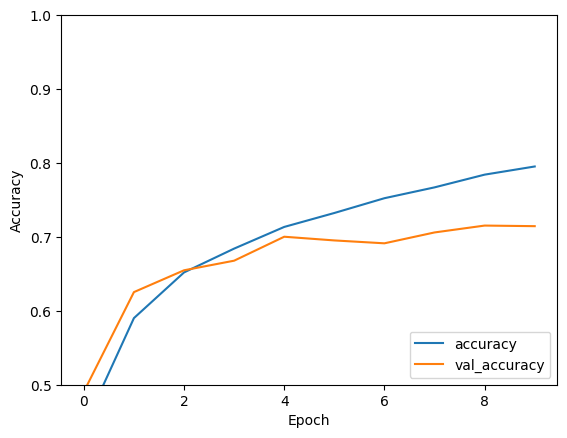

In [36]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate (test_images, test_labels, verbose=2)

In [39]:
print(test_acc, test_loss)

0.7145000100135803 0.8643118143081665
